# Mushroom Hunting
Lab Assignment One: Exploring Table Data

**_Jake Oien, Seung Ki Lee, Jenn Le_**

## Business Understanding

This data can be useful in identifying trends in poisonous mushrooms and assist in the classification of unknown mushrooms.

Dataset Source: https://www.kaggle.com/uciml/mushroom-classification

## Data Understanding

In [143]:
import pandas as pd
import numpy as np

df = pd.read_csv('./mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Value Replacements

This data is extremely confusing since we don't inherently know what any of the labels mean. In order to make it more intuitive, we replace the labels with more meaningful values, descriptive labels or variable representations where it makes sense.

The main point of this dataset is to classify whether or not a mushroom is possibly poisonous. To make this point clear, we change the class values from "e" and "p" to a binary value of either 0 or 1. We use the same binary value to indicate whether or not a mushroom has bruises. For number of rings, we replace the letters with the numerical value of the number of rings. Every other value is replaced with its descriptive label to make the data easier to read. We also changed the column names to snake case to be more in line with naming conventions.

In [144]:
# Changing column names
for col_name, col in df.iteritems():
    df.rename(columns={col_name:col_name.replace('-', '_')}, inplace=True)
    
# Changing 'class' to 'poisonous' to make intentions clear
df.rename(columns={"class": "poisonous"}, inplace=True)

# Replacing data values, also shows the possible values for each attribute
df.poisonous.replace(to_replace=['e', 'p'],
                     value=[0, 1], inplace=True)

df.cap_shape.replace(to_replace=['b', 'c', 'x', 'f', 'k', 's'],
                     value=["bell", "conical", "convex", "flat", "knobbed", "sunken"],
                     inplace=True)

df.cap_surface.replace(to_replace=['f', 'g', 'y', 's'],
                     value=["fibrous", "grooves", "scaly", "smooth"], 
                     inplace=True)

df.cap_color.replace(to_replace=['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "green", "pink", 
                            "purple", "red", "white", "yellow"], 
                     inplace=True)

df.bruises.replace(to_replace=['f', 't'],
                     value=[0, 1], 
                     inplace=True)

df.odor.replace(to_replace=['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                     value=["almond", "anise", "creosote", "fishy", "foul", 
                            "musty", "none", "pungent", "spicy"], 
                     inplace=True)

df.gill_attachment.replace(to_replace=['a', 'd', 'f', 'n'],
                     value=["attached", "descending", "free", "notched"], 
                     inplace=True)

df.gill_spacing.replace(to_replace=['c', 'w', 'd'],
                     value=["close", "crowded", "distant"], 
                     inplace=True)

df.gill_size.replace(to_replace=['b', 'n'],
                     value=["broad", "narrow"], 
                     inplace=True)

df.gill_color.replace(to_replace=['k', 'n', 'b', 'h', 'g', 'r', 'o', 
                                  'p', 'u', 'e', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "gray", 
                            "green", "orange", "pink", "purple", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_shape.replace(to_replace=['e', 't'],
                     value=["enlarging", "tapering"], 
                     inplace=True)

df.stalk_root.replace(to_replace=['b', 'c', 'u', 'e', 'z', 'r', '?'],
                     value=["bulbous", "club", "cup", "equal", "rhizomorphs", 
                            "rooted", "missing"], 
                     inplace=True)

df.stalk_surface_above_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_surface_below_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_color_above_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_color_below_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.veil_type.replace(to_replace=['p', 'u'],
                     value=["partial", "universal"], 
                     inplace=True)

df.veil_color.replace(to_replace=['n', 'o', 'w', 'y'],
                     value=["brown", "orange", "white", "yellow"], inplace=True)

df.ring_number.replace(to_replace=['n', 'o', 't'],
                     value=[0, 1, 2], inplace=True)

df.ring_type.replace(to_replace=['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                     value=["cobwebby", "evanescent", "flaring", "large", 
                            "none", "pendant", "sheathing", "zone"], 
                     inplace=True)

df.spore_print_color.replace(to_replace=['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "green", 
                            "orange", "purple", "white", "yellow"], 
                     inplace=True)

df.population.replace(to_replace=['a', 'c', 'n', 's', 'v', 'y'],
                     value=["abundant", "clustered", "numerous", "scattered", 
                            "several", "solitary"], 
                     inplace=True)

df.habitat.replace(to_replace=['g', 'l', 'm', 'p', 'u', 'w', 'd'],
                     value=["grasses", "leaves", "meadows", "paths", "urban", 
                            "waste", "woods"], 
                     inplace=True)

df.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,0,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,0,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,1,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,0,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [145]:
# Show the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
poisonous                   8124 non-null int64
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null int64
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number  

Most of the attributes are visual descriptors so we store them as objects in the pandas dataframe. The only attributes that are stored as numerical values are those such as "poisonous" which has a binary value or those such as "ring_number" which would have an ordinal value.

In [146]:
df.describe()

,poisonous,bruises,ring_number
count,8124.000000,8124.000000,8124.000000
mean,0.482029,0.415559,1.069424
std,0.499708,0.492848,0.271064
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,2.000000


# Data Visualization

## Relationship Between Attributes

We used matplotlib and seaborn library for the visualization of data.

In [147]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## Correlation Matrix

In order to see the relationships between ordinal features, we composed a correlation matrix.

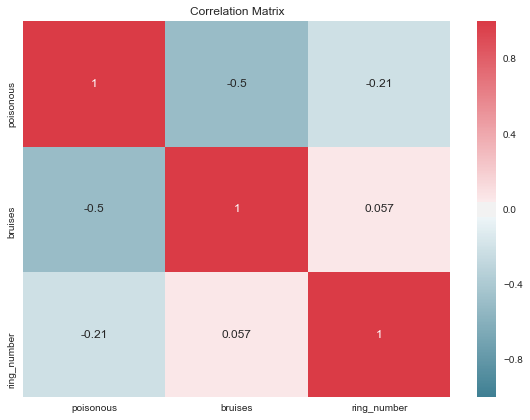

In [148]:
sns.set(style="white", color_codes=True)

#correlation matrix
corr = df.corr()

#matplotlib set up
f, ax = plt.subplots(figsize=(8,6))

#set up colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#compute heatmap
sns.heatmap(corr, cmap = cmap, annot=True)
plt.title('Correlation Matrix')
f.tight_layout()

Because there are only three attributes stored as ordinal values, it can only tell us so much. The most notable and strong correlation suggests that bruises are negatively correlated with toxicity. On the other hand probability of mushroom being toxic increases as number of rings decrease. Yet existence of bruises and number of rings show no significant correlation.

To see further correlations on accounts of nominal attributes, we've create plots to represent average probability of a mushroom being toxic for each attributes. To best show the average probability of toxicity in relation to nominal attributes, we chose factor plots.

## Factor Plots

The nominal attributes can be grouped into five major sections 

1. Cap
2. Gill
3. Stalk
4. Veil & Ring
5. Others

Through factor plots, we will establish significant correlations between these attributes and Toxicity of the Mushroom where 1 is poisonous and 0 is edible on poisonous scale. So if we see a trait that maps to a number close to average toxicity (marked as poisonous) of 1, we know that attribute has high correlation with how poisonous the mushroom is and vice versa. On the other hand, average poisonous field amounting to 0.5 shows that no significant ties are established between set trait and toxicity of the mushroom.

### Cap Attribute Group

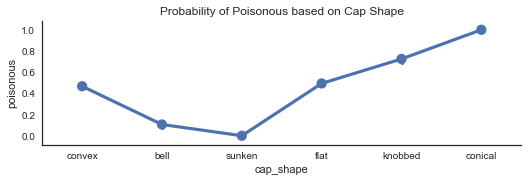

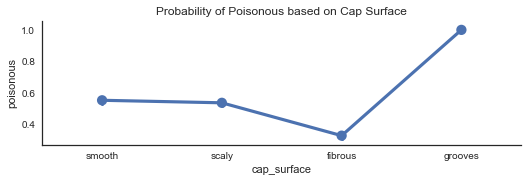

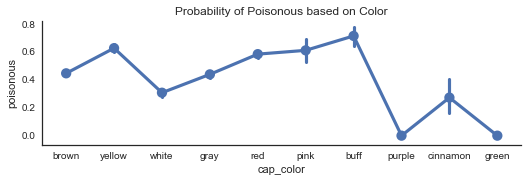

In [149]:
# nominal attributes related to Cap
sns.factorplot(y="poisonous", x="cap_shape", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Cap Shape')
sns.factorplot(y="poisonous", x="cap_surface", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Cap Surface')
sns.factorplot(y="poisonous", x="cap_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Color')

On regards to cap, the following traits in a mushroom suggests more likelihood of toxicity : 

1. conical cap shape
2. grooves cap surface
3. buff cap color

And the following traits suggests more likelihood of edibility : 

1. sunken shape
2. fibrous surface
3. purple and green cap color

### Gill Attribute Group

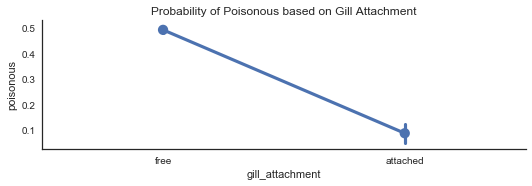

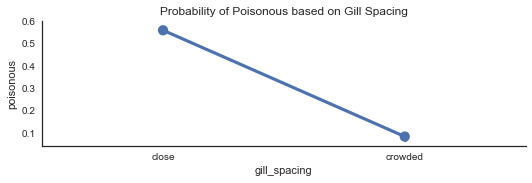

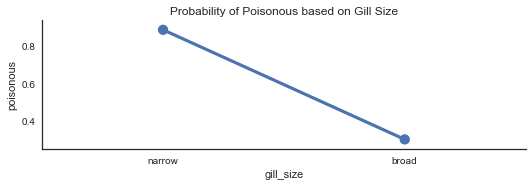

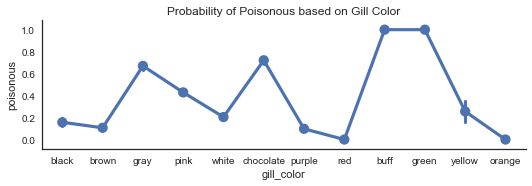

In [131]:
# nominal attributes related to Gill
sns.factorplot(y="poisonous", x="gill_attachment", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Attachment')
sns.factorplot(y="poisonous", x="gill_spacing", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Spacing')
sns.factorplot(y="poisonous", x="gill_size", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Size')
sns.factorplot(y="poisonous", x="gill_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Gill Color')

On regards to gill, the following traits in a mushroom suggests more likelihood of toxicity : 

1. free
2. close gill spacing
3. narrow gill size
4. buff and green gill color

And the following traits suggests more likelihood of edibility : 

1. attatched
2. crowded spacing
3. broad size
4. red and orange gill color
    
### Stalk Attribute Group   

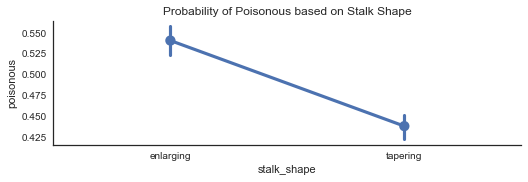

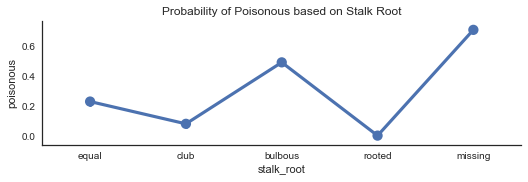

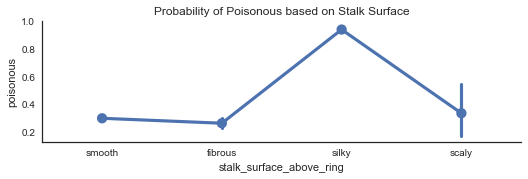

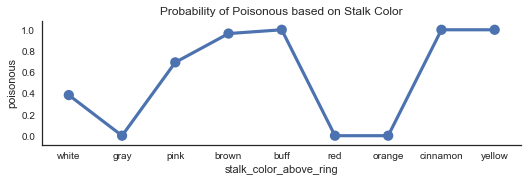

In [150]:
# nominal attributes related to Stalk

# NOTE: below ring attributes turns out to be identical to above ring. 
# Taken out for efficiency.

sns.factorplot(y="poisonous", x="stalk_shape", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Shape')
sns.factorplot(y="poisonous", x="stalk_root", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Root')
sns.factorplot(y="poisonous", x="stalk_surface_above_ring", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Surface')
sns.factorplot(y="poisonous", x="stalk_color_above_ring", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Stalk Color')



On regards to stalk, the following traits in a mushroom suggests more likelihood of toxicity : 

1. missing root
2. silky surface above & below ring
3. yellow, cinnamon, buff, and brown color above and below ring

And the following traits suggests more likelihood of edibility : 

1. rooted and dub root
2. smooth and fibrous surface above & below ring
3. gray, red, and orange color above & below ring

The shape of the stalk had no significant relationship with toxicity of the mushroom.

    
### Veil & Ring Attribute Group    

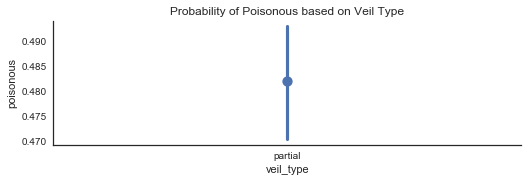

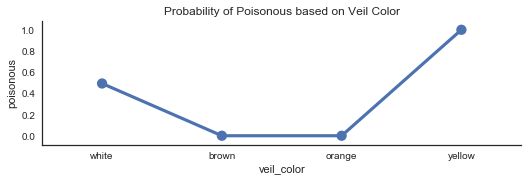

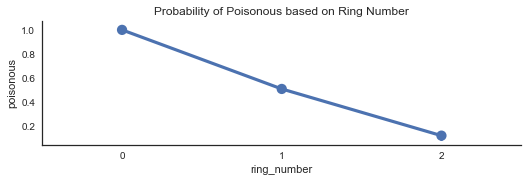

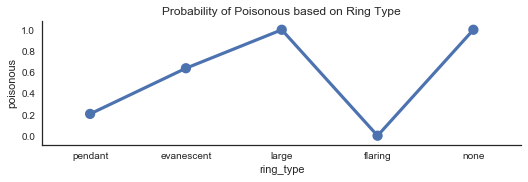

In [151]:
#nominal attributes related to veil & ring
sns.factorplot(y="poisonous", x="veil_type", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Veil Type')
sns.factorplot(y="poisonous", x="veil_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Veil Color')
sns.factorplot(y="poisonous", x="ring_number", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Ring Number')
sns.factorplot(y="poisonous", x="ring_type", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Ring Type')


On regards to veil & ring, the following traits in a mushroom suggests more likelihood of toxicity : 

1. yellow veil color
2. no ring
3. large ring type

And the following traits suggests more likelihood of edibility : 

1. brown and orange veil color
2. more than one rings
3. pendant or flaring ring type

The type of the veil which were all partial had no significant relationship with toxicity of the mushroom.

One other interesting thing is that the inverse correlation between more number of rings and toxicity of the mushroom visualized in correlation map is again confirmed using factorplot.

    
### Other Attribute Group    

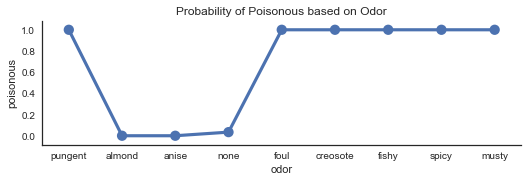

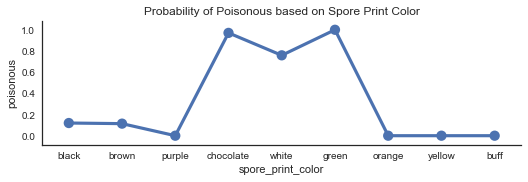

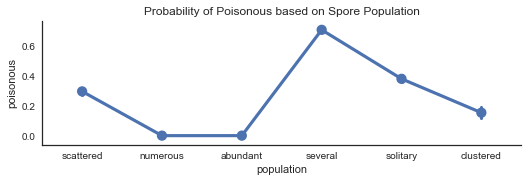

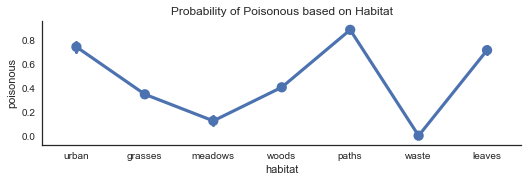

In [152]:
#nominal attributes under Other Attribute Group
sns.factorplot(y="poisonous", x="odor", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Odor')
sns.factorplot(y="poisonous", x="spore_print_color", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Spore Print Color')
sns.factorplot(y="poisonous", x="population", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Spore Population')
sns.factorplot(y="poisonous", x="habitat", data=df, size = 2.5, aspect = 3)
plt.title('Probability of Poisonous based on Habitat')

The following traits in a mushroom suggests more likelihood of toxicity : 

1. pugent, foul, creosote, fishy, spicy, and musty odor
2. white, green or chocolate spore print
3. several in population
4. grows around leaves, paths, and urban areas

And the following traits suggests more likelihood of edibility : 

1. almond, anise, and no odor
2. buff, yellow, orange, purple, brown or black spore print
3. numerous or abundant in population
4. grows around meadows or waste

From entirity of Factorplots, we can observe that the same colors on different parts of mushroom can imply different thing about the toxicity. The most confident measure of toxicity seems to be conical and grooves cap, silky stalk, and zero rings. To contrary, most reliable measure of edibility is sunken and fibrous cap, rooted stalk, and more than one rings.

## Dimensionality Reduction

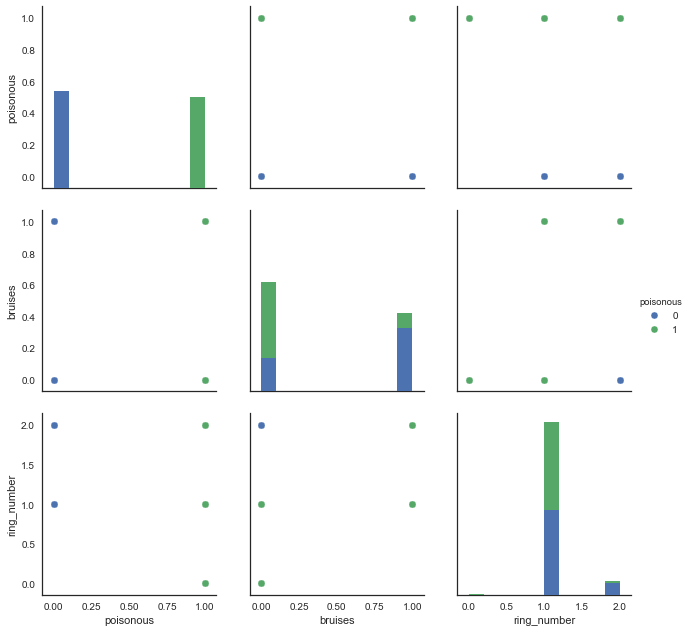

In [153]:
from sklearn import preprocessing

sns.pairplot(df, hue='poisonous', size=3)

From overlays in the pairplot, it is clear that features in the plot are not outputting any meaningful information on the toxicity of the mushroom.